# Regression on Graduate Admission Prediction dataset

In [1]:
import tensorflow as tf
import numpy as np
import pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.regularizers import l2
import tensorflow.keras.datasets.mnist as mnist


import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

## Set parameters

In [2]:
lr = 0.001
no_epochs = 100
batch_size = 8
beta = 0.001

NO_INPUTS = 5
no_neurons_3 = 10
no_neurons_45 = 50

dropout_rate = 0.2

seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

## Read data

In [3]:
# read in data from csv file
df = pd.read_csv('admission_predict.csv')
df=df.values

In [4]:
# data
# generate training data from csv file

# inputs are the second colomn to the last second column
X = df[:,1:8]
#apply feature elimination
X = np.delete(X, 2, 1)
X = np.delete(X, 4, 1)
# normalizing every input
mean_arr = np.mean(X, axis = 0)
std_arr = np.std(X, axis = 0)
for i in range(400):
    for j in range(5):
        X[i,j] = (X[i,j] - mean_arr[j])/std_arr[j]
        
# target is the last column
Y = df[:,8]
Y = Y.reshape(400,1)
# split training and testing sets (70/30)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42) 

## 3 layer model

In [5]:
def three():
    # min and max value for weight initialization
    w_min_relu = -np.sqrt(6)/np.sqrt(NO_INPUTS+no_neurons_3)
    w_max_relu = np.sqrt(6)/np.sqrt(NO_INPUTS+no_neurons_3)
    w_min_linear = -np.sqrt(6)/np.sqrt(no_neurons_3+1)
    w_max_linear = np.sqrt(6)/np.sqrt(no_neurons_3+1)
    
    err = np.zeros((1, no_epochs))
    model = Sequential([Dense(no_neurons_3, activation='relu', 
                          kernel_initializer=RandomUniform(w_min_relu, w_max_relu), 
                          kernel_regularizer=l2(beta)),
                    Dense(1, activation = 'linear',
                          kernel_initializer=RandomUniform(w_min_linear, w_max_linear),
                          kernel_regularizer=l2(beta))])
    
    model.compile(optimizer='sgd', 
              loss='mean_squared_error',
              metrics=['mse'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=0,
                    use_multiprocessing=True,
                    validation_data=(x_test, y_test))
    
    err = history.history['val_mse']
            
    return err

## 4 layer model

In [6]:
def four(dropout):
    # min and max value for weight initialization
    w_min_relu1 = -np.sqrt(6)/np.sqrt(NO_INPUTS+no_neurons_45)
    w_max_relu1 = np.sqrt(6)/np.sqrt(NO_INPUTS+no_neurons_45)
    w_min_relu2 = -np.sqrt(6)/np.sqrt(2*no_neurons_45)
    w_max_relu2 = np.sqrt(6)/np.sqrt(2*no_neurons_45)
    w_min_linear = -np.sqrt(6)/np.sqrt(no_neurons_45+1)
    w_max_linear = np.sqrt(6)/np.sqrt(no_neurons_45+1)
    
    err = np.zeros((1, no_epochs))
    if(dropout):
         model = Sequential([Dropout(dropout_rate),
                             Dense(no_neurons_45, activation='relu', 
                                   kernel_initializer=RandomUniform(w_min_relu1, w_max_relu1), 
                                   kernel_regularizer=l2(beta)),
                             Dropout(dropout_rate),
                             Dense(no_neurons_45, activation='relu', 
                                   kernel_initializer=RandomUniform(w_min_relu2, w_max_relu2), 
                                   kernel_regularizer=l2(beta)),
                             Dropout(dropout_rate),
                             Dense(1, activation = 'linear',
                                   kernel_initializer=RandomUniform(w_min_linear, w_max_linear),
                                   kernel_regularizer=l2(beta))])
    else:
        model = Sequential([Dense(no_neurons_45, activation='relu', 
                                  kernel_initializer=RandomUniform(w_min_relu1, w_max_relu1), 
                                  kernel_regularizer=l2(beta)),
                            Dense(no_neurons_45, activation='relu', 
                                  kernel_initializer=RandomUniform(w_min_relu2, w_max_relu2), 
                                  kernel_regularizer=l2(beta)),
                            Dense(1, activation = 'linear',
                                  kernel_initializer=RandomUniform(w_min_linear, w_max_linear),
                                  kernel_regularizer=l2(beta))])
   
    
    model.compile(optimizer='sgd', 
              loss='mean_squared_error',
              metrics=['mse'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=0,
                    use_multiprocessing=True,
                    validation_data=(x_test, y_test))
    
    err = history.history['val_mse']
            
    return err

## 5 layer model

In [7]:
def five(dropout):
    # min and max value for weight initialization
    w_min_relu1 = -np.sqrt(6)/np.sqrt(NO_INPUTS+no_neurons_45)
    w_max_relu1 = np.sqrt(6)/np.sqrt(NO_INPUTS+no_neurons_45)
    w_min_relu2 = -np.sqrt(6)/np.sqrt(2*no_neurons_45)
    w_max_relu2 = np.sqrt(6)/np.sqrt(2*no_neurons_45)
    w_min_linear = -np.sqrt(6)/np.sqrt(no_neurons_45+1)
    w_max_linear = np.sqrt(6)/np.sqrt(no_neurons_45+1)
    
    err = np.zeros((1, no_epochs))
    if(dropout):
         model = Sequential([Dropout(dropout_rate),
                             Dense(no_neurons_45, activation='relu', 
                                   kernel_initializer=RandomUniform(w_min_relu1, w_max_relu1), 
                                   kernel_regularizer=l2(beta)),
                             Dropout(dropout_rate),
                             Dense(no_neurons_45, activation='relu', 
                                   kernel_initializer=RandomUniform(w_min_relu2, w_max_relu2), 
                                   kernel_regularizer=l2(beta)),
                             Dropout(dropout_rate),
                             Dense(no_neurons_45, activation='relu', 
                                   kernel_initializer=RandomUniform(w_min_relu2, w_max_relu2), 
                                   kernel_regularizer=l2(beta)),
                             Dropout(dropout_rate),
                             Dense(1, activation = 'linear',
                                   kernel_initializer=RandomUniform(w_min_linear, w_max_linear),
                                   kernel_regularizer=l2(beta))])
    else:
        model = Sequential([Dense(no_neurons_45, activation='relu', 
                                  kernel_initializer=RandomUniform(w_min_relu1, w_max_relu1), 
                                  kernel_regularizer=l2(beta)),
                            Dense(no_neurons_45, activation='relu', 
                                  kernel_initializer=RandomUniform(w_min_relu2, w_max_relu2), 
                                  kernel_regularizer=l2(beta)),
                            Dense(no_neurons_45, activation='relu', 
                                  kernel_initializer=RandomUniform(w_min_relu2, w_max_relu2), 
                                  kernel_regularizer=l2(beta)),
                            Dense(1, activation = 'linear',
                                  kernel_initializer=RandomUniform(w_min_linear, w_max_linear),
                                  kernel_regularizer=l2(beta))])
   
    
    model.compile(optimizer='sgd', 
              loss='mean_squared_error',
              metrics=['mse'])
    
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=0,
                    use_multiprocessing=True,
                    validation_data=(x_test, y_test))
    
    err = history.history['val_mse'] 
            
    return err

## Compare performance

In [8]:
err_3 = three()
err_4 = four(0)
err_4_dropout = four(1)
err_5 = five(0)
err_5_dropout = five(1)


In [9]:
print('3-layer model mean squared error: %g'%err_3[no_epochs-1])
print('4-layer model mean squared error: %g'%err_4[no_epochs-1])
print('4-layer model mean squared error (with dropout): %g'%err_4_dropout[no_epochs-1])
print('5-layer model mean squared error: %g'%err_5[no_epochs-1])
print('5-layer model mean squared error (with dropout): %g'%err_5_dropout[no_epochs-1])

3-layer model mean squared error: 0.00655096
4-layer model mean squared error: 0.00594526
4-layer model mean squared error (with dropout): 0.00692622
5-layer model mean squared error: 0.0065505
5-layer model mean squared error (with dropout): 0.00846995


## Plot loss curves

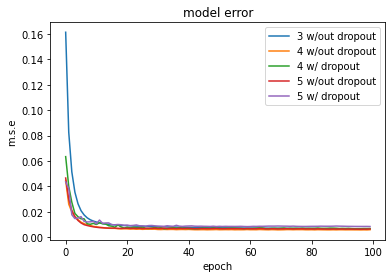

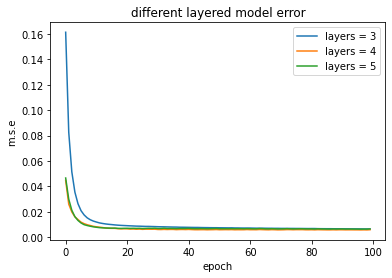

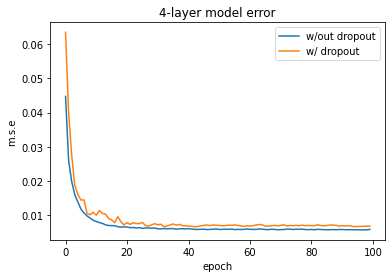

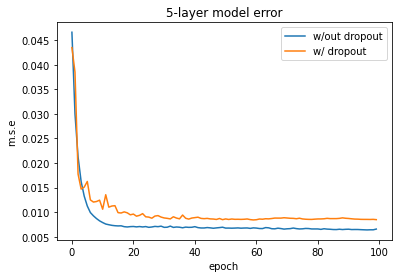

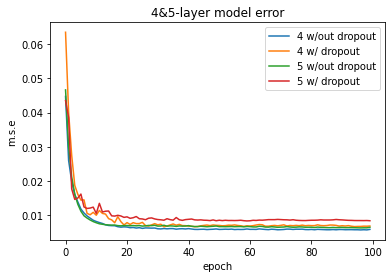

In [10]:
# summarize history for accuracy

# all models
plt.plot(err_3)
plt.plot(err_4)
plt.plot(err_4_dropout)
plt.plot(err_5)
plt.plot(err_5_dropout)
plt.title('model error')
plt.ylabel('m.s.e')
plt.xlabel('epoch')
plt.legend(['3 w/out dropout','4 w/out dropout', '4 w/ dropout', '5 w/out dropout', '5 w/ dropout'], loc='upper right')
plt.show()

# non dropout models
plt.plot(err_3)
plt.plot(err_4)
plt.plot(err_5)
plt.title('different layered model error')
plt.ylabel('m.s.e')
plt.xlabel('epoch')
plt.legend(['layers = 3', 'layers = 4', 'layers = 5'], loc='upper right')
plt.show()

# 4-layer with/without dropout
plt.plot(err_4)
plt.plot(err_4_dropout)
plt.title('4-layer model error')
plt.ylabel('m.s.e')
plt.xlabel('epoch')
plt.legend(['w/out dropout', 'w/ dropout'], loc='upper right')
plt.show()

# 5-layer with/without dropout
plt.plot(err_5)
plt.plot(err_5_dropout)
plt.title('5-layer model error')
plt.ylabel('m.s.e')
plt.xlabel('epoch')
plt.legend(['w/out dropout', 'w/ dropout'], loc='upper right')
plt.show()

# 4&5-layer with/without dropout
plt.plot(err_4)
plt.plot(err_4_dropout)
plt.plot(err_5)
plt.plot(err_5_dropout)
plt.title('4&5-layer model error')
plt.ylabel('m.s.e')
plt.xlabel('epoch')
plt.legend(['4 w/out dropout', '4 w/ dropout', '5 w/out dropout', '5 w/ dropout'], loc='upper right')
plt.show()
